<h1> <center> HIERACHICHAL CLUSTERING 
<\center> <\h1>

Hierachichal clustering is a technique that build a hierachy of clusters where each node is a cluster constisting of the clusters of its daughter nodes .
In this approach of clustering we do not specify the number of clusters that we want beforehand 

Each node in a cluster tree represents contains a group of similar data .Clusters at one level join with clusters in the next level up, using a degree of similarity

This can be done win two approaches 
+ Divisive 
+ Agglomerative

A dendrogram represents nested clusters 

**Divisive** is essentially top down in that you start with all observations in a large cluster then break it down to smaller pieces 

**Agglomerative** is the opposite of that , ie each observation starts in its own cluster and pairs of clusters are merged together as they move up the hierachy 

![](<https://www.saedsayad.com/images/Clustering_h1.png>)


![](<https://www.statisticshowto.com/wp-content/uploads/2016/11/clustergram.png>)

In the case when we need to create a disimilarity for disjoint clusters we can cut the hierachy at some point...thus creating a number of clusters 

## The Agglomerative algorithm for hierarchichal clustering 

Say we have n data points we will:
1. construct n clusters for each data point
2. Compute the distance proximity matrix( an $\mathbf{n*n}$ table)
$$
\left[\begin{array}{cc} 
0 & \\
d(2,1) & 0 \\
d(3,1) & d(3,2) & 0 \\ 
:: & :: & :: \\ 
d(n,1) & d(n,2) & ... & 0
\end{array}\right]$$
3. Repeat 
 > merge the two clusters that are closest to each other 
 
 > update the proximity matrix with the new values 
 
 
We run the above two steps untill the specified cluster number is reached or untill there is only one cluster left 
4. Until a single cluster remains 

What us key is the computation of proximity between the clusters , those with a single point and those with multiple points 
This raises three questions 
1. How do we calculate this distance between clusters 
2. How do we tell clusters that are near each other 
3. Which points do we use 

So let us assume we want to calculate the distance similarity between individuals 

| individual 1        |   A |A|
|-----------------|--------------|-----------| 
|Age       |   BMI  |Height|
|54    | 40           | 35        |


| individual 2        |   A |A|
|-----------------|--------------|-----------| 
|Age       |   BMI  |Height|
|34   | 45         | 37        |

We can use the euclidean distance for this .  
So if we have a data of n indivuduals we will have an n by n similarity matrix 

To calculate the distance between clusters we can use a variety of approaches 
1. Single Linkage clustering 
2. Complete linkage clustering -maxiimum distance between two points in a cluster 
3. Average linkage ..The avarage distance of each point in one cluster to another point in the other cluster then getting the average 
4. Centroid linkage clustering 


###### Advantages 
+ Easier to implement 
+ Do not require cluster number to be specified 
+ Dendrogram useful in understanding the results 
--------------------------------------
+ But it is not efficient in large datasets 
+ It does not produce the same clusters each time it runs due to random initialization of centroids 

### Implementation

In [1]:
import numpy as np 
import pandas as pd
# from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

<hr>
<h1 id="clustering_vehicle_dataset">Clustering on Vehicle dataset</h1>

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

In [7]:
df=pd.read_csv(r'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv')

In [17]:
df['type'].value_counts()

0.0    88
1.0    29
Name: type, dtype: int64

In [18]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    float64
 3   resale     117 non-null    float64
 4   type       117 non-null    float64
 5   price      117 non-null    float64
 6   engine_s   117 non-null    float64
 7   horsepow   117 non-null    float64
 8   wheelbas   117 non-null    float64
 9   width      117 non-null    float64
 10  length     117 non-null    float64
 11  curb_wgt   117 non-null    float64
 12  fuel_cap   117 non-null    float64
 13  mpg        117 non-null    float64
 14  lnsales    117 non-null    float64
 15  partition  117 non-null    float64
dtypes: float64(14), object(2)
memory usage: 14.8+ KB


Text(0.5, 0, 'Hp')

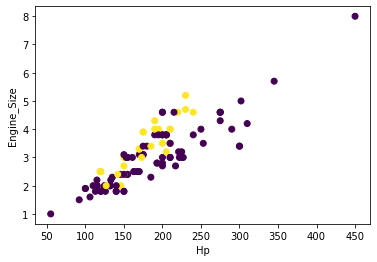

In [16]:
plt.scatter(x=df['horsepow'],y=df['engine_s'],c=df['type'])
plt.ylabel('Engine_Size')
plt.xlabel('Hp')

In [19]:
df.tail()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0
116,Volkswagen,GTI,5.596,13.760,0.0,17.50,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,1.722,0.0


In [14]:
# some cleaning we drop the rows with na and remain with only the features we want to use 
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Feature transformation 

In [20]:
Features=df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
Features.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [21]:
# we use the min max scaler 
from sklearn.preprocessing import MinMaxScaler
X = Features.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

### Clustering with Sci-Kit Learn 

In [22]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [23]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
## Add it to our data frame to indicate which cluster a row belongs to 
df['Cluster_']=agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,Cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

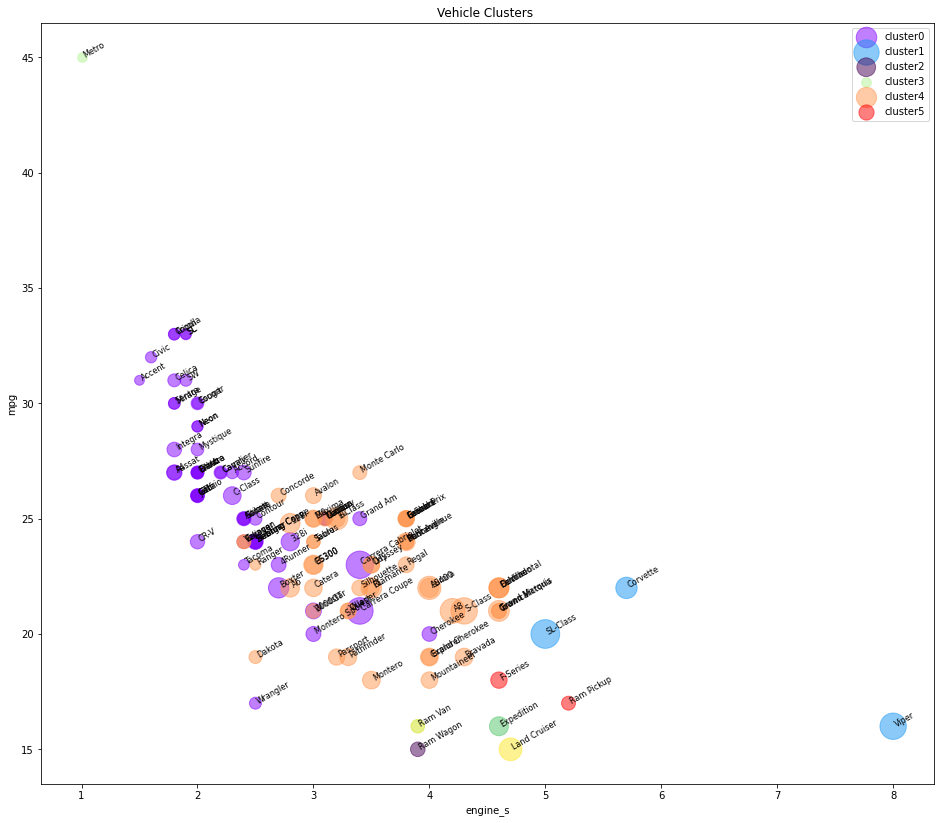

In [25]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset =df[df.Cluster_ == label]
    for i in subset.index:
            plt.text(subset.engine_s[i], subset.mpg[i],str(subset['model'][i]), rotation=30,fontsize=8) 
    plt.scatter(subset.engine_s, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Vehicle Clusters ')
plt.xlabel('engine_s')
plt.ylabel('mpg')

As you can see, we can see the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 1 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:

In [21]:
df.groupby(['Cluster_','type'])['Cluster_'].count()

Cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: Cluster_, dtype: int64

In [26]:
# let us investigate the clusters 
agg_cars = df.groupby(['Cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

C:\Users\DE737AP\AppData\Local\Temp\ipykernel_21848\3684876155.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['Cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
Cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

It is obvious that we have 3 main clusters with the majority of vehicles in those.

__Cars__:
- Cluster 1: with almost high mpg, and low in horsepower.
- Cluster 2: with good mpg and horsepower, but higher price than average.
- Cluster 3: with low mpg, high horsepower, highest price.
    
    
    
__Trucks__:
- Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
- Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
- Cluster 3: with good mpg and horsepower, low price.


Text(0,0.5,'mpg')

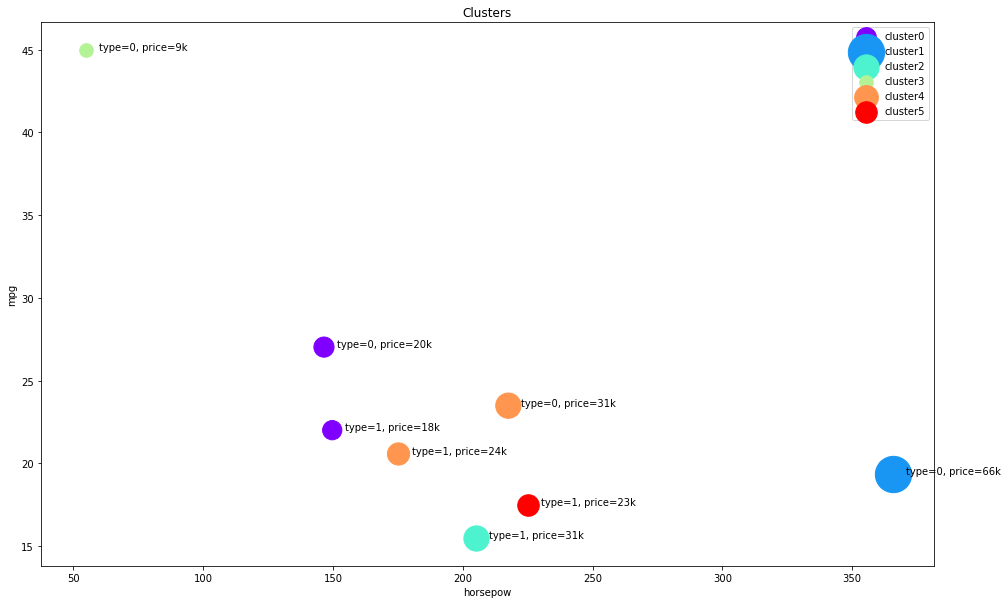

In [24]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


### Using Sci pY 

In [25]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
    - single
    - complete
    - average
    - weighted
    - centroid
    
    
We use __average__ for our case, but feel free to change it to see how the results change

In [26]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'average')

# ---------------------------------------------------------------------------------------------------------
# from scipy.cluster.hierarchy import fcluster
# max_d = 3
# clusters = fcluster(Z, max_d, criterion='distance')
# clusters

#  That is to introduce a cutting line 

# _--------------------------------------------------------------------------------------------------------

# k = 5
# clusters = fcluster(Z, k, criterion='maxclust')
# clusters

# We can use the above to deetermin the clusters as in the k means case

C:\Users\christopher\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


#### The dendrogram 

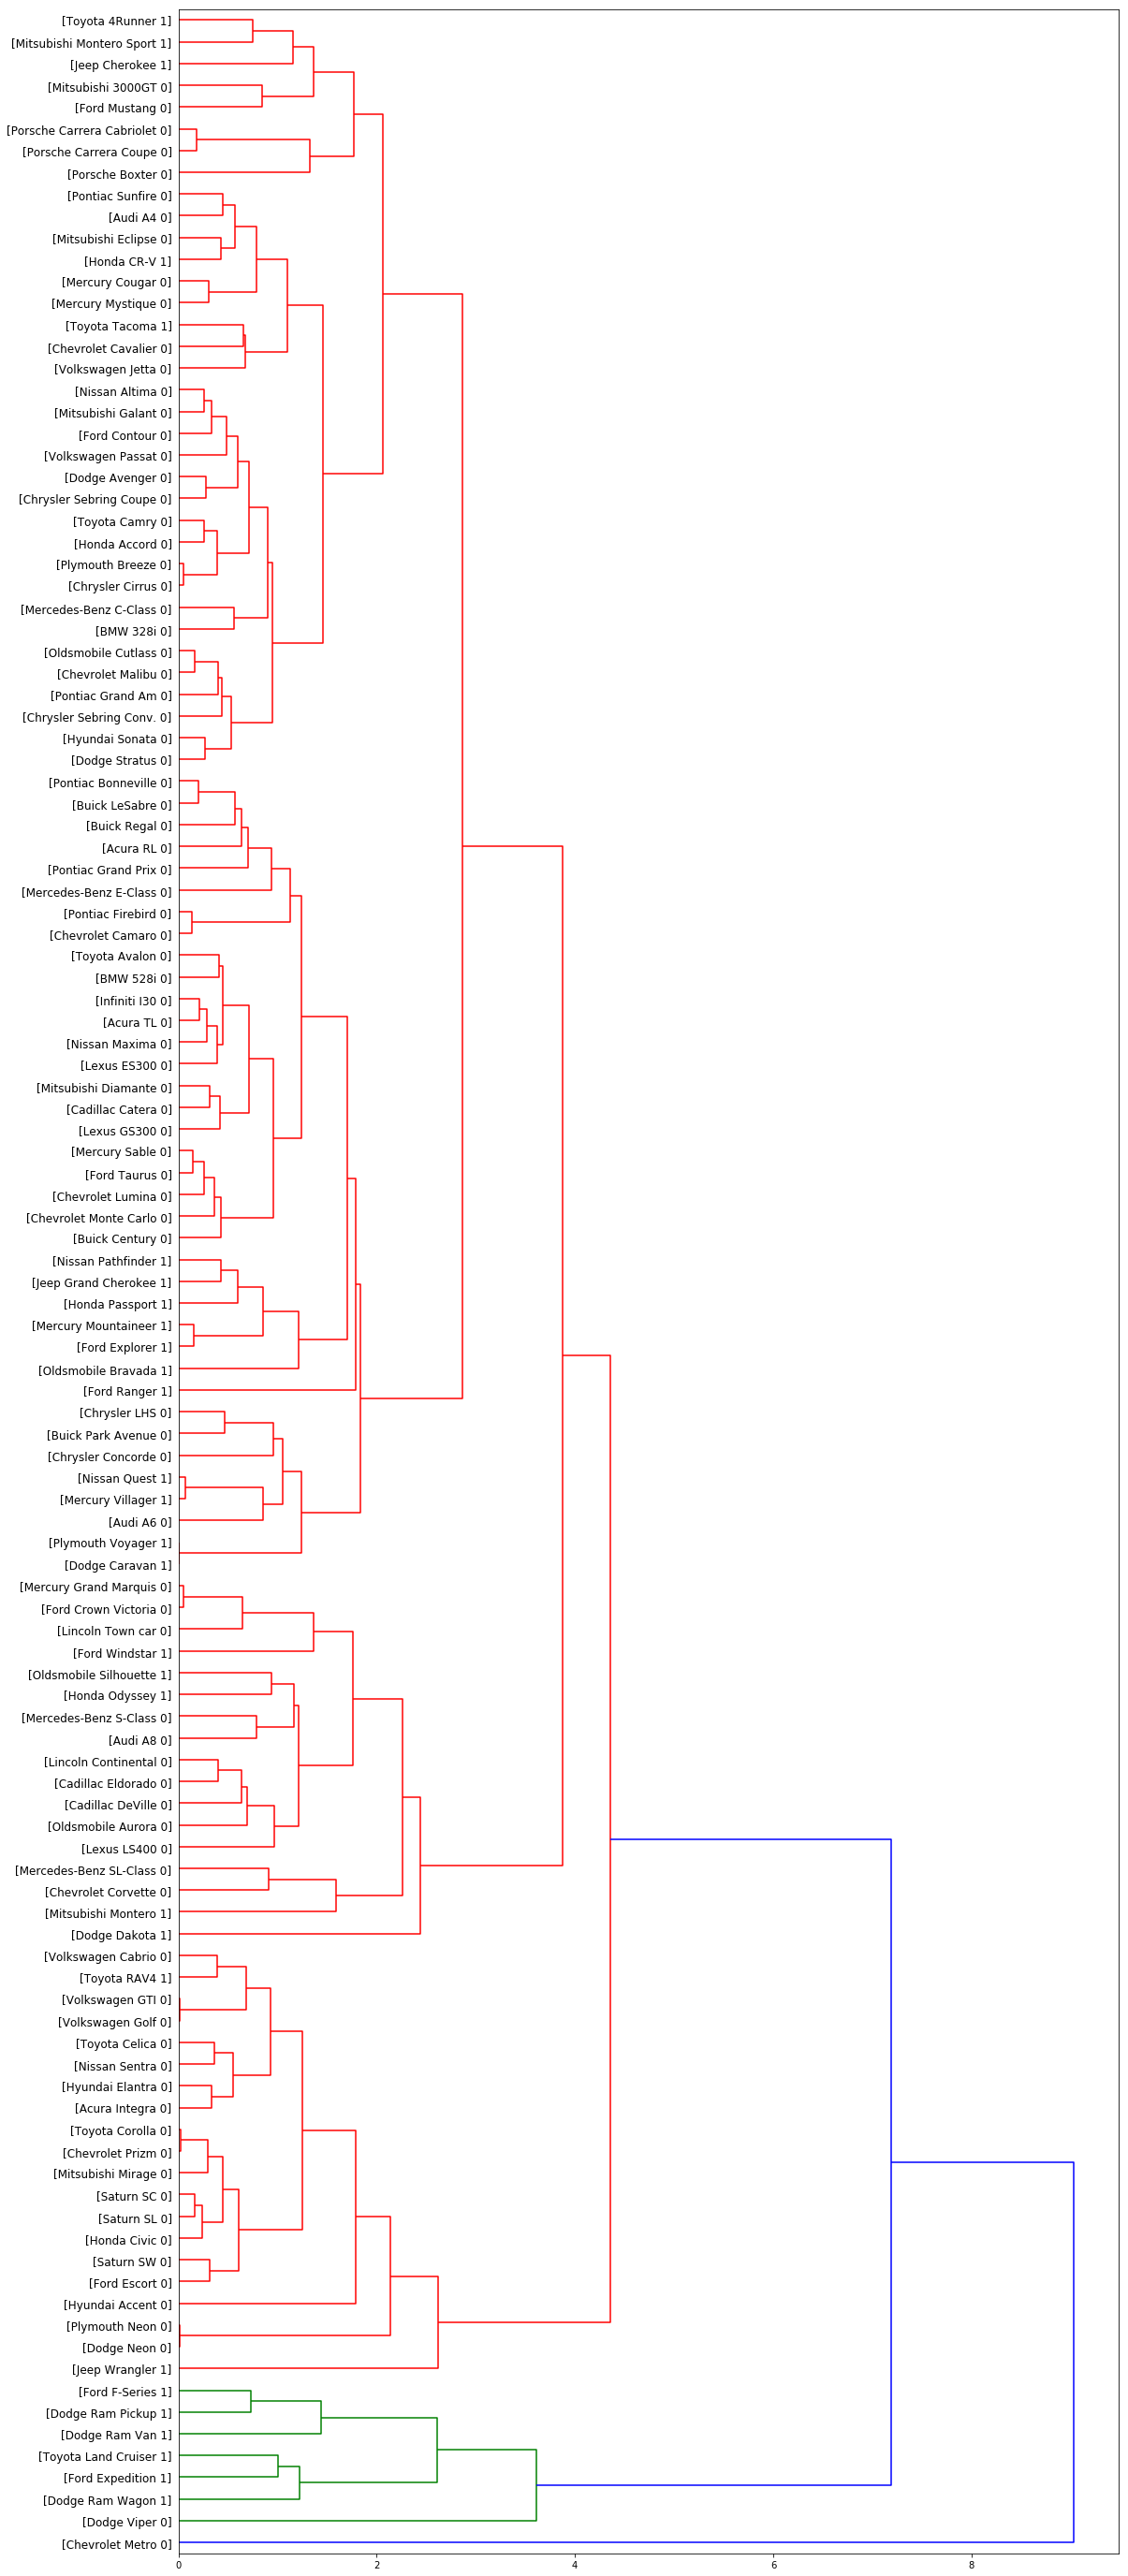

In [28]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<h3>Attribution:</h3>  
<p> This notebook is hugely attributed to <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

Some edits have been made by the Zindua School team specifically <a href="https://www.linkedin.com/in/christopher-aloo/" target="_blank">Christopher Aloo</a>

Other contributors: <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>, <a href="https://www.linkedin.com/in/reevejamesd/">James Reeve</a>, <a href="www.linkedin.com/in/cyril-michino">Cyril Michino</a>, <a href="https://www.linkedin.com/in/cyril-michino/">Aseta Shadrach</a>